# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# load data
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/compresive_strength_concrete.csv')
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# check general information the data is carrying
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
dataset.shape

(1030, 9)

In [6]:
# rename features
cols_name = {'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
       'Water  (component 4)(kg in a m^3 mixture)': 'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
       'Age (day)': 'Age', 'Concrete compressive strength(MPa, megapascals) ': 'CC_strength'}

dataset.rename(columns=cols_name, inplace=True)

In [7]:
# check null values
dataset.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
CC_strength           0
dtype: int64

In [8]:
# statistical view of the features
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CC_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


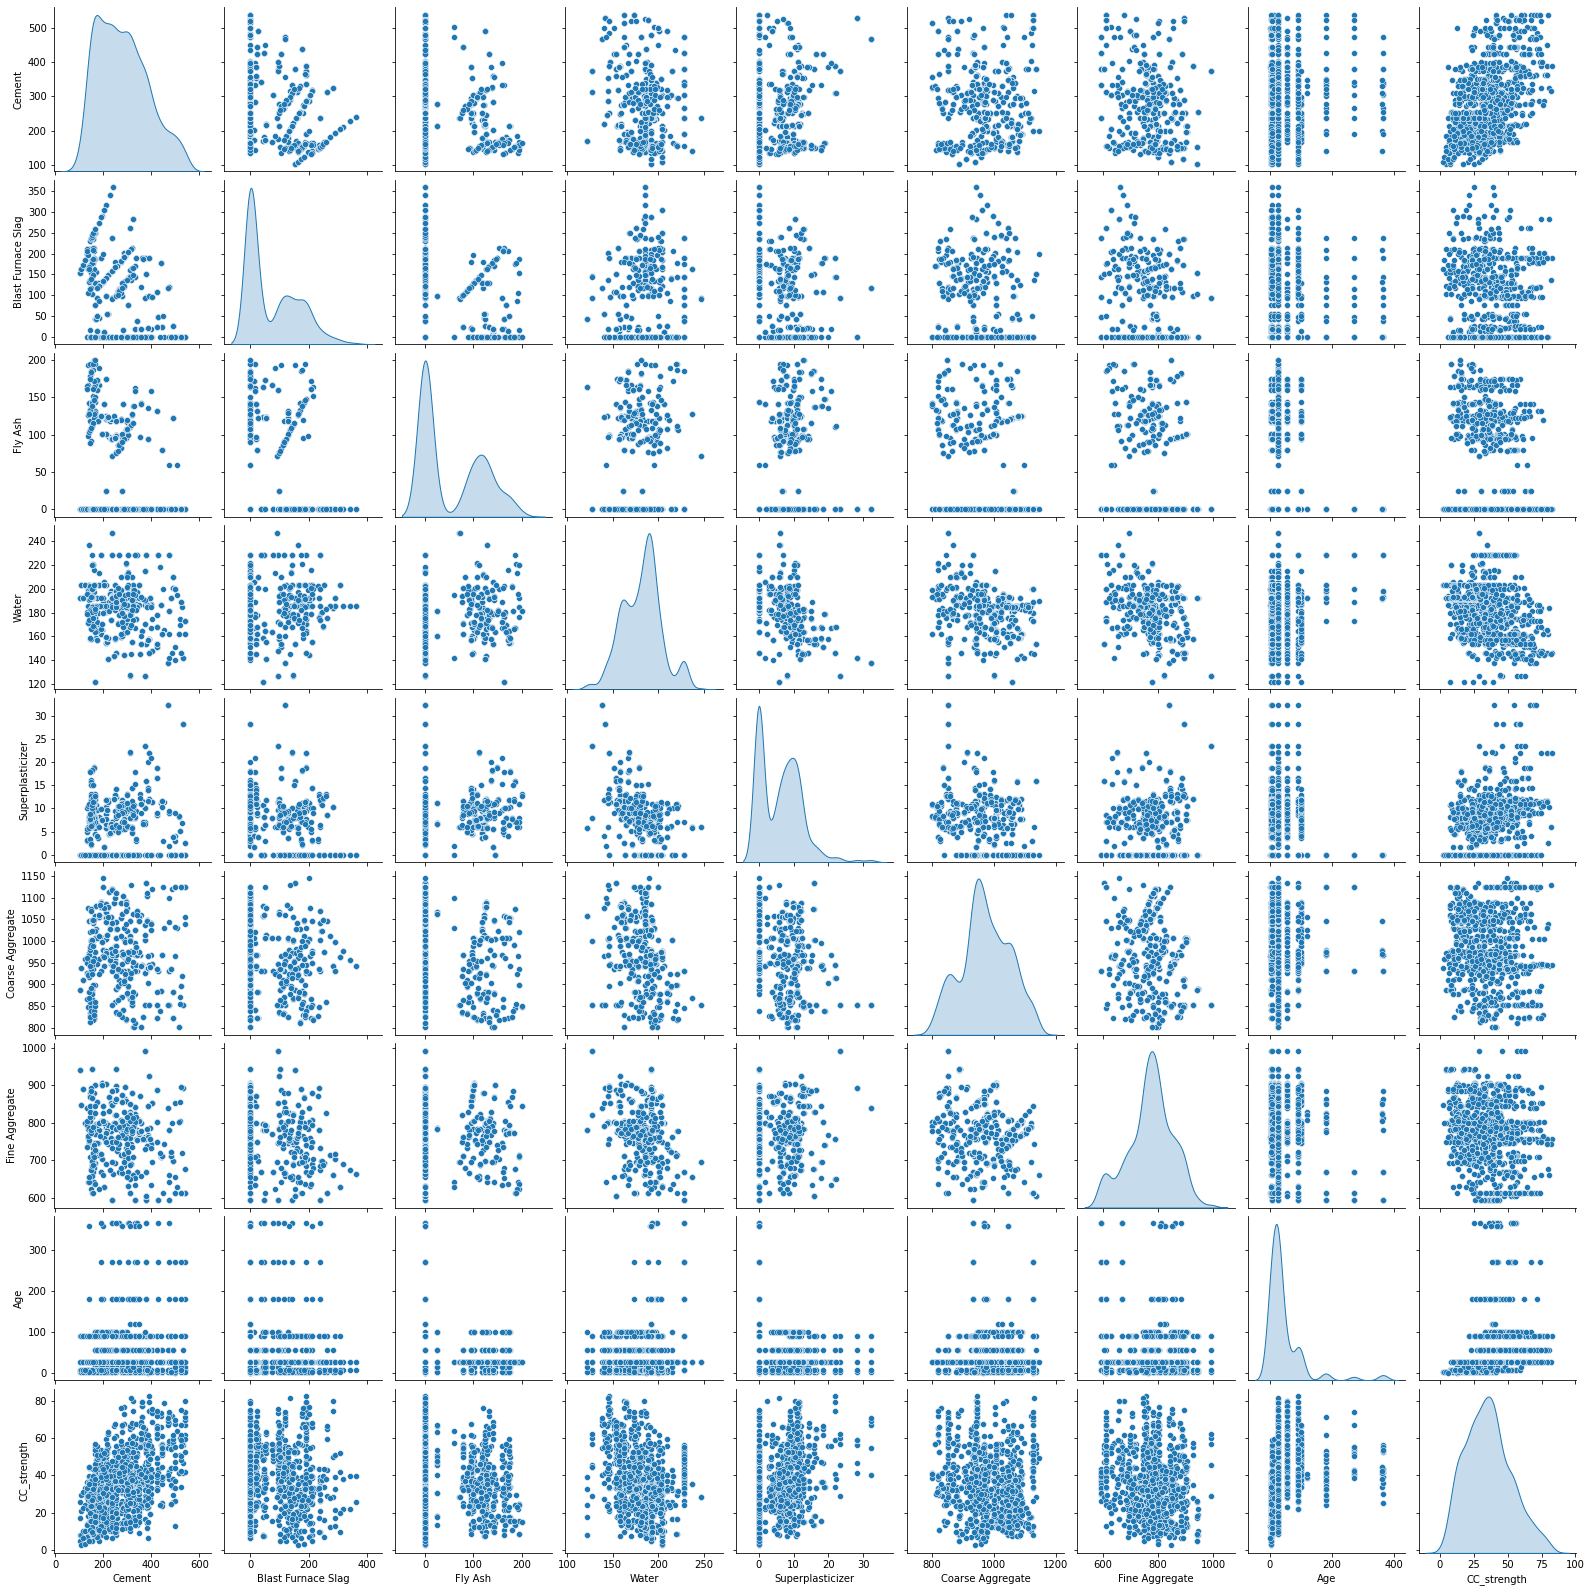

In [9]:
# inspect joint distribution of features from the dataset
sns.pairplot(dataset, diag_kind='kde')

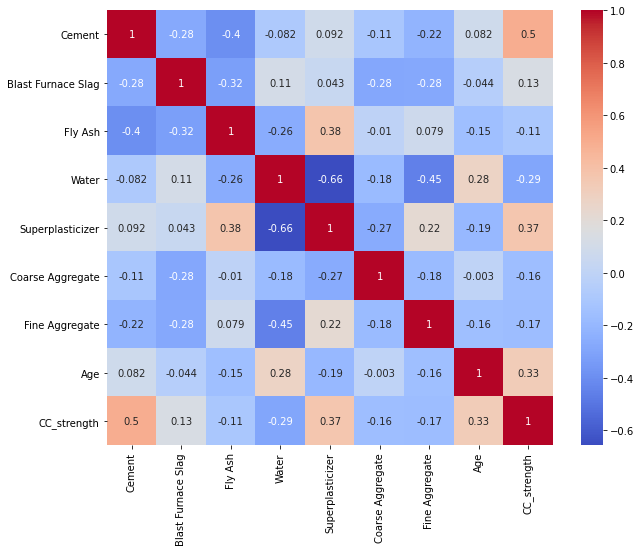

In [10]:
# check the correlation between features to see how each varible impacts others
corr = dataset.corr()

# figure size
plt.figure(figsize=(10,8))

# plot features with respect to target varible (concrete-compressive-strenght)
sns.heatmap(corr, cmap='coolwarm', annot=True)

## data preprocession

In [11]:
# split data into input (X) and output (y)
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [12]:
# split X and y into 70% train set and 30% test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X,y, test_size = 0.3,
                                                                            random_state=0)

In [13]:
train_features.shape, test_features.shape

((721, 8), (309, 8))

In [14]:
train_labels.shape, test_labels.shape

((721,), (309,))

In [15]:
# normailize the data
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)

train_features = (train_features-train_mean) / train_std
test_features = (test_features-train_mean) / train_std

In [16]:
# convert dataframe into numpy array
# features
train_features = train_features.to_numpy()
test_features = test_features.to_numpy()

# labels
train_labels = train_labels.to_numpy()
test_labels = test_labels.to_numpy()

In [17]:
type(train_features), type(train_labels)

(numpy.ndarray, numpy.ndarray)

## build and train model

In [18]:
# baseline model definition
def build_model():
  model = Sequential([
      Dense(10, activation='relu', input_shape=(train_features.shape[-1],)),
      Dense(8, activation='relu'),
      Dense(6, activation='relu'),
      Dense(1)
  ])


  model.compile(optimizer='adam', loss='mae', metrics=['mse'])

  return model

In [19]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [20]:
# train model on first definition with 100 epochs and 20% validation split
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=100, batch_size=128,
                    verbose=0)

In [21]:
# store history in dataframe
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mse,val_loss,val_mse
95,11.315451,203.718430,11.378535,206.153442
96,11.276941,202.279510,11.335220,204.724335
97,11.242111,200.865753,11.287999,203.259811
98,11.207687,199.527328,11.251294,201.776596
99,11.172756,198.074448,11.207872,200.483856


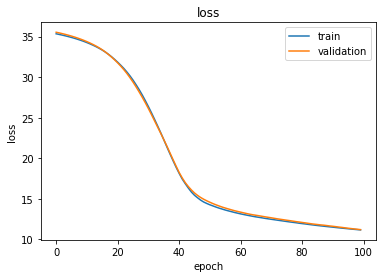

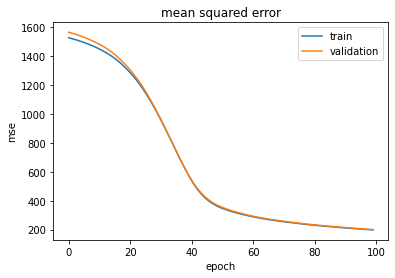

In [22]:
# plot loss during training
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

# plot mse during training
plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [23]:
# second model definition

def build_model2():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(train_features.shape[-1],)),
      Dense(64, activation='relu'),
      Dense(1)])


  model.compile(optimizer='adam', loss='mse')

  return model

In [24]:
model = build_model2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [25]:
# train of the model
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=100, batch_size=8,
                    verbose=0)

In [26]:
# store the history
hist = pd.DataFrame(history.history)
hist.tail()

,loss,val_loss
95,18.549610,47.406044
96,18.624960,46.916145
97,19.185644,48.115398
98,17.835848,47.508598
99,18.025923,44.261444


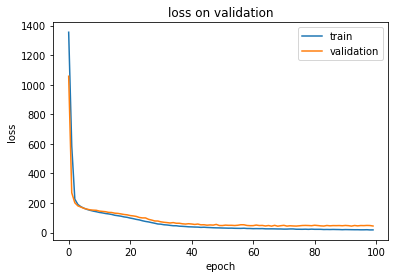

In [27]:
# plot the loss
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [28]:
# evaluation on test set
mse_loss = model.evaluate(test_features, test_labels, verbose=0)
mse_loss

36.59780502319336

In [29]:
# find the accuracy with root mean squared error
rmse = np.sqrt(mse_loss)
rmse

6.049611972944493

In [30]:
# make predictions on test data
predictions = model.predict(test_features)

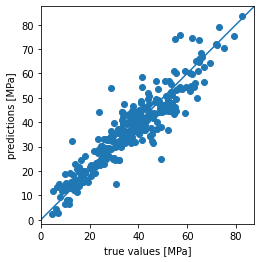

In [31]:
# plot truth and predictions
plt.scatter(test_labels, predictions)
plt.xlabel('true values [MPa]')
plt.ylabel('predictions [MPa]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.xlim([0,plt.ylim()[1]])
_ = plt.plot([-100,100], [-100,100])

## Save Model

In [32]:
# save model and architecture to single file
model.save('concrete.h5')
print('model saved')

model saved
